culture: Images=114, Captions=114, QA Pairs=114, Commonsense Reasoning=114
food: Images=150, Captions=150, QA Pairs=150, Commonsense Reasoning=151
history: Images=150, Captions=150, QA Pairs=158, Commonsense Reasoning=150
media_and_movies: Images=150, Captions=150, QA Pairs=139, Commonsense Reasoning=149
national_achievements: Images=75, Captions=74, QA Pairs=74, Commonsense Reasoning=74
nature: Images=150, Captions=150, QA Pairs=149, Commonsense Reasoning=150
personalities: Images=150, Captions=150, QA Pairs=150, Commonsense Reasoning=150
politics: Images=150, Captions=150, QA Pairs=154, Commonsense Reasoning=152
sports: Images=12, Captions=1, QA Pairs=12, Commonsense Reasoning=1


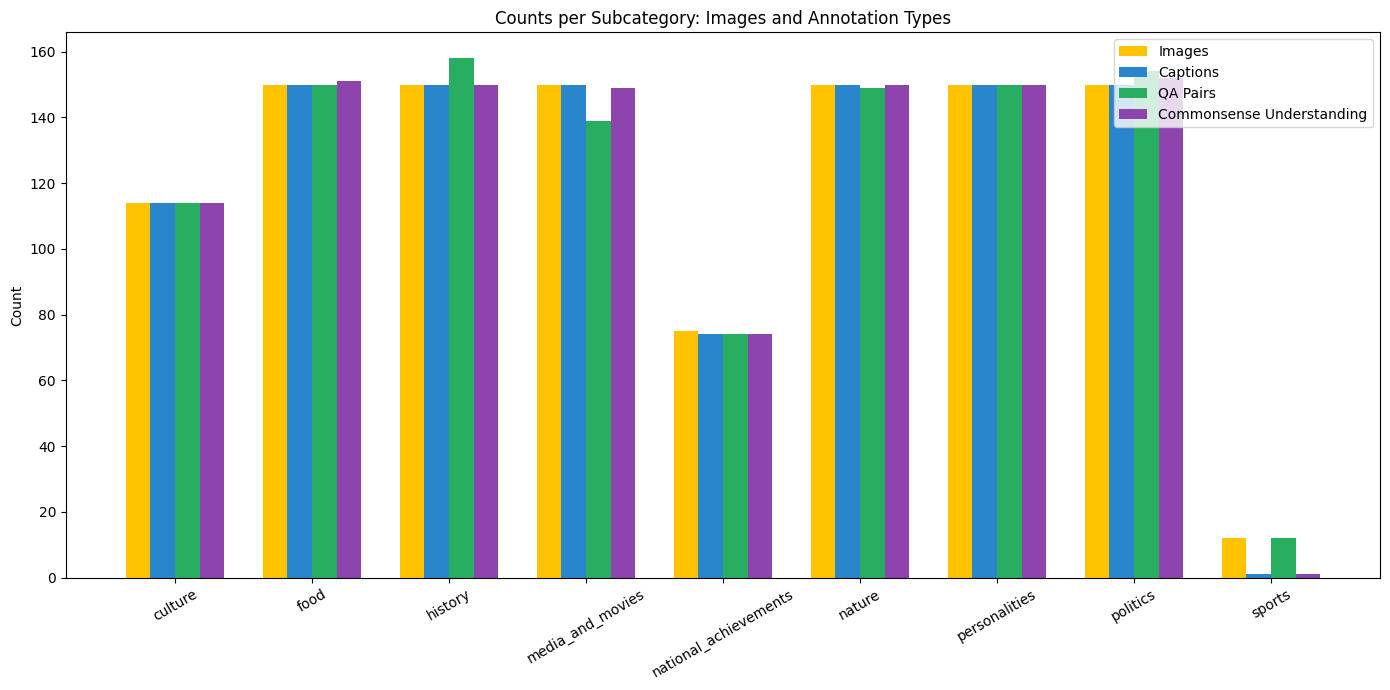

In [16]:
# Exploratory Data Analysis (EDA) of BanglaVerse Dataset (All Subcategories)
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# List of subcategories
subcategories = [
    'culture',
    'food',
    'history',
    'media_and_movies',
    'national_achievements',
    'nature',
    'personalities',
    'politics',
    'sports'
 ]

base_dir = '../data/'

def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return json.load(f)

# Annotation file type keywords
annotation_types = {
    'captions': 'captions',
    'qa_pairs': 'qa_pairs',
    'commonsense_reasoning': 'commonsense_reasoning'
}

summary = {}

for subcat in subcategories:
    img_dir = os.path.join(base_dir, subcat, 'images')
    ann_dir = os.path.join(base_dir, subcat, 'annotations')
    # Count images
    img_count = 0
    if os.path.exists(img_dir):
        img_count = len([f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg','.jpeg','.png','.bmp','.gif','.tiff','.webp','.jfif','.svg','.JPG','.PNG'))])
    # Dynamically find annotation files and count records
    ann_counts = {key: 0 for key in annotation_types}
    if os.path.exists(ann_dir):
        for f in os.listdir(ann_dir):
            f_lower = f.lower()
            f_path = os.path.join(ann_dir, f)
            for key, keyword in annotation_types.items():
                if keyword in f_lower and f_lower.endswith('.json'):
                    try:
                        data = load_json(f_path)
                        ann_counts[key] += len(data)
                    except Exception as e:
                        pass
    summary[subcat] = {'image_count': img_count, **ann_counts}

# Display summary
for subcat in summary:
    print(f'{subcat}: Images={summary[subcat]["image_count"]}, Captions={summary[subcat]["captions"]}, QA Pairs={summary[subcat]["qa_pairs"]}, Commonsense Reasoning={summary[subcat]["commonsense_reasoning"]}')

# Bar plot: 4 bars per category (image, captions, qa_pairs, commonsense_reasoning)
labels = subcategories
image_counts = [summary[subcat]['image_count'] for subcat in labels]
caption_counts = [summary[subcat]['captions'] for subcat in labels]
qa_counts = [summary[subcat]['qa_pairs'] for subcat in labels]
reasoning_counts = [summary[subcat]['commonsense_reasoning'] for subcat in labels]

x = np.arange(len(labels))  # label locations
width = 0.18

plt.figure(figsize=(14,7))
plt.bar(x - 1.5*width, image_counts, width, label='Images', color='#FFC300')  # bold yellow
plt.bar(x - 0.5*width, caption_counts, width, label='Captions', color='#2986CC')  # bold blue
plt.bar(x + 0.5*width, qa_counts, width, label='QA Pairs', color='#27AE60')  # bold green
plt.bar(x + 1.5*width, reasoning_counts, width, label='Commonsense Understanding', color='#8E44AD')  # bold purple
plt.xticks(x, labels, rotation=30)
plt.ylabel('Count')
plt.title('Counts per Subcategory: Images and Annotation Types')
plt.legend()
plt.tight_layout()
plt.show()